## Importing Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## Data Importing

In [2]:
df = pd.read_csv('height-weight.csv')
#reading csv file with the help of pandas library

## Data Exploration

In [4]:
df.head()
#exploring first 5 rows of the dataframe

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


Text(0, 0.5, 'Height')

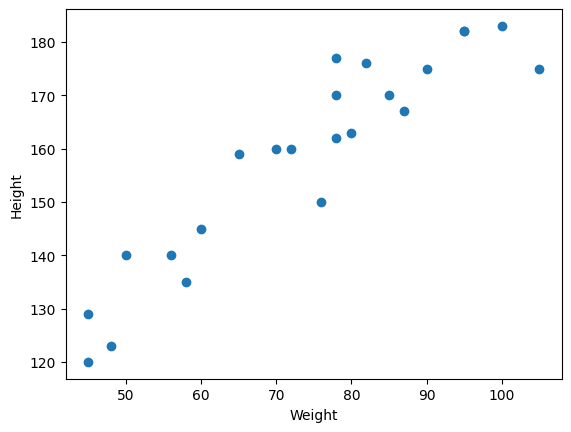

In [6]:
#scatter plot
plt.scatter(df['Weight'], df['Height'])
plt.xlabel('Weight')
plt.ylabel('Height')
#scatter helps to project data points on X and Y Axis

In [8]:
#we can see that as weight is increasing height is also increasing,
#thus a kind of linear relationship exists
#is the relation postive or negative? we can find by correlation

df.corr()

,Weight,Height
Weight,1.000000,0.931142
Height,0.931142,1.000000


Here, it is showing that weight and height are highly positively coorelated with correlation as 0.931142.

df.corr() finds Pearson coorelation coefficient.

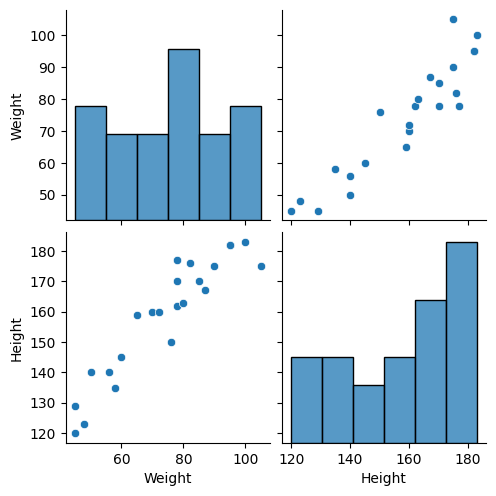

In [9]:
## seaborn for visualization
import seaborn as sns
sns.pairplot(df)

In [17]:
## independent and dependent features
#X = df['Weight']
#type(X)
#if we execute above code, we get a series datatype for X but we need a dataframe
#always make sure that independent feature must be a dataframe or a two dimensional array
X = df[['Weight']]
#X
type(X) #this is a dataframe
X.shape #one column

(23, 1)

In [19]:
y = df['Height']
# dependent feature can be a series or can have just one dimensional array ie. 1d array
y.shape

(23,)

# Train Test Split

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [21]:
X_train.shape

(17, 1)

## Standardization

Because in linear regression we use gradient descent and for that we need to do feature scaling
If we don't do that then gradient descent would take a long time to reach to a solution.

Standardization can be done with the help of z score which is (xi - mean)/(standard deviation)

In [23]:
from sklearn.preprocessing import StandardScaler

In [25]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

**Using just transform for test data means that we are just going to use the mean and standard deviation of training data and not the test data.
In training we use fit_transform but in testing data we use transform.
We can't use fit_transform for test data because that would cause data leakage.**

In [26]:
X_test = scaler.transform(X_test)

In [27]:
X_test

array([[ 0.33497168],
       [ 0.33497168],
       [-1.6641678 ],
       [ 1.36483141],
       [-0.45256812],
       [ 1.97063125]])

In [28]:
X_test.shape

(6, 1)

# Fitting a Model

In [29]:
from sklearn.linear_model import LinearRegression

In [30]:
regression = LinearRegression()

In [31]:
regression.fit(X_train, y_train)

LinearRegression()

In [32]:
regression

LinearRegression()

In [36]:
print("coefficient or slope: ", regression.coef_)
print("intercept: ", regression.intercept_)

coefficient or slope:  [17.2982057]
intercept:  156.47058823529412


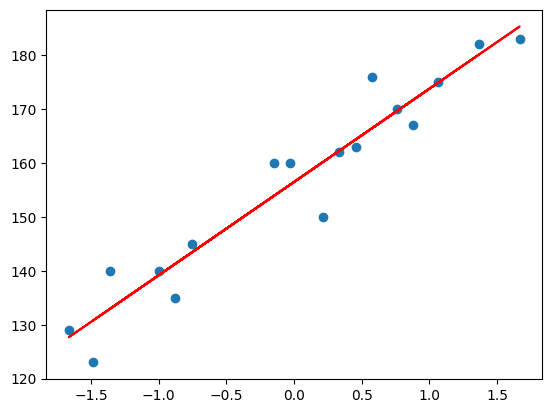

In [40]:
## plot training data best fit line
plt.scatter(X_train, y_train)
plt.plot(X_train, regression.predict(X_train), "r")

#Prediction for Test Data

In [42]:
y_pred = regression.predict(X_test)

# Performance Metrices

In [43]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [44]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

114.84069295228699
9.66512588679501
10.716374991212605


In [46]:
from sklearn.metrics import r2_score

In [47]:
score = r2_score(y_test, y_pred)
print(score)

0.7360826717981276


Conclusion: To improve the model further, we can explore more algorithms.

OLS Linear Regression

In [48]:
import statsmodels.api as sm

In [49]:
model = sm.OLS(y_train, X_train).fit()

In [52]:
prediction = model.predict(X_test)
print(prediction)

[  5.79440897   5.79440897 -28.78711691  23.60913442  -7.82861638
  34.08838469]


In [53]:
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                 Height   R-squared (uncentered):                   0.012
Model:                            OLS   Adj. R-squared (uncentered):             -0.050
Method:                 Least Squares   F-statistic:                             0.1953
Date:                Mon, 18 Dec 2023   Prob (F-statistic):                       0.664
Time:                        18:21:33   Log-Likelihood:                         -110.03
No. Observations:                  17   AIC:                                      222.1
Df Residuals:                      16   BIC:                                      222.9
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=17
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


Here if we see, for OLS also we are getting value of coefficient as 17.29 which is close to what we got in linear regression.

##Prediction for new data

In [56]:
regression.predict(scaler.transform([[72]]))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([155.97744705])

We need to use scaler.transform to new input values for getting the correct prediction.

Thus, whenever while doing predictions, you need to make sure that scaling transformations need to be done.